In [1]:
import numpy as np

In [2]:
def householder(A):

    n = A.shape[0]
    v = np.zeros(n, dtype=np.double)
    u = np.zeros(n, dtype=np.double)
    z = np.zeros(n, dtype=np.double)

    for k in range(0, n - 2):

        if np.isclose(A[k + 1, k], 0.0):
            α = -np.sqrt(np.sum(A[(k + 1) :, k] ** 2))
        else:
            α = -np.sign(A[k + 1, k]) * np.sqrt(np.sum(A[(k + 1) :, k] ** 2))

        two_r_squared = α ** 2 - α * A[k + 1, k]
        v[k] = 0.0
        v[k + 1] = A[k + 1, k] - α
        v[(k + 2) :] = A[(k + 2) :, k]
        u[k:] = 1.0 / two_r_squared * np.dot(A[k:, (k + 1) :], v[(k + 1) :])
        z[k:] = u[k:] - np.dot(u, v) / (2.0 * two_r_squared) * v[k:]

        for l in range(k + 1, n - 1):

            A[(l + 1) :, l] = (
                A[(l + 1) :, l] - v[l] * z[(l + 1) :] - v[(l + 1) :] * z[l]
            )
            A[l, (l + 1) :] = A[(l + 1) :, l]
            A[l, l] = A[l, l] - 2 * v[l] * z[l]

        A[-1, -1] = A[-1, -1] - 2 * v[-1] * z[-1]
        A[k, (k + 2) :] = 0.0
        A[(k + 2) :, k] = 0.0

        A[k + 1, k] = A[k + 1, k] - v[k + 1] * z[k]
        A[k, k + 1] = A[k + 1, k]

In [9]:
# test the implementation

# generate symmetric matrix
A = np.array([[0.7868,   0.0193, 0.5206,   0.1400],
   [0.0193,   0.4049,   0.3447,   0.5439],
   [0.5206,   0.3447,   0.2742,   0.5219],
   [0.1400,   0.5439,   0.5219,   0.8571]])

eigen_values = np.linalg.eigvals(A)
print(np.round(np.sort(eigen_values), 10))

# apply householder reduction
householder(A)

# check if the result is tridiagonal
print(np.round(A, 10))

[-0.21825584  0.04006711  0.81952922  1.68165951]
[[ 0.7868     -0.53944124  0.          0.        ]
 [-0.53944124  0.6089661  -0.77042552  0.        ]
 [ 0.         -0.77042552  0.88734476 -0.02094449]
 [ 0.          0.         -0.02094449  0.03988914]]


In [10]:
# calculate eigen values
eigen_values = np.linalg.eigvalsh(A)
print(np.round(np.sort(eigen_values), 10))


[-0.21825584  0.04006711  0.81952922  1.68165951]


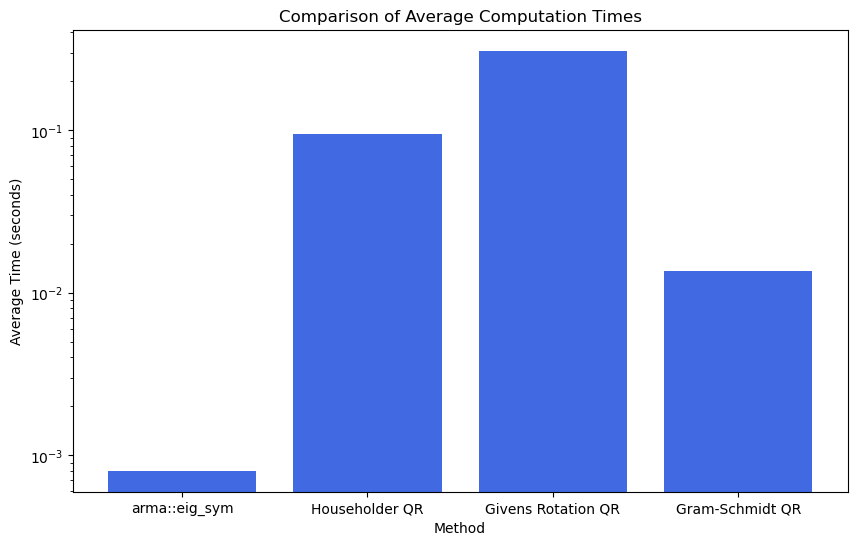

In [5]:
import matplotlib.pyplot as plt

# Data
methods = ['arma::eig_sym', 'Householder QR', 'Givens Rotation QR', 'Gram-Schmidt QR']
times = [0.000805139, 0.0941005, 0.308566, 0.0135888]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(methods, times, color='royalblue')
plt.xlabel('Method')
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Computation Times')
plt.yscale('log')
plt.show()


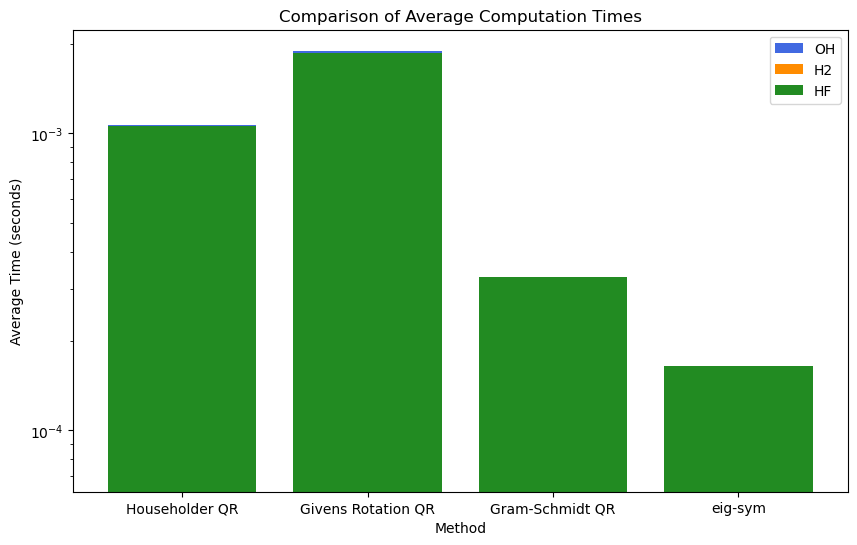

In [7]:
oh_times = [0.00107, 0.00190, 0.000313, 0.000139]
h2_times = [8.9e-5, 9.2e-5, 7.3e-5, 7.4e-5]
hf_times = [0.00106, 0.00186, 0.000327, 0.000164]
methods = ["Householder QR", "Givens Rotation QR", "Gram-Schmidt QR", "eig-sym"]

plt.figure(figsize=(10, 6))
# bar plot of the average times for different methods and molecules
plt.bar(methods, oh_times, color='royalblue', label='OH')
plt.bar(methods, h2_times, color='darkorange', label='H2')
plt.bar(methods, hf_times, color='forestgreen', label='HF')
plt.xlabel('Method')
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Computation Times')
plt.yscale('log')
plt.legend()
plt.show()

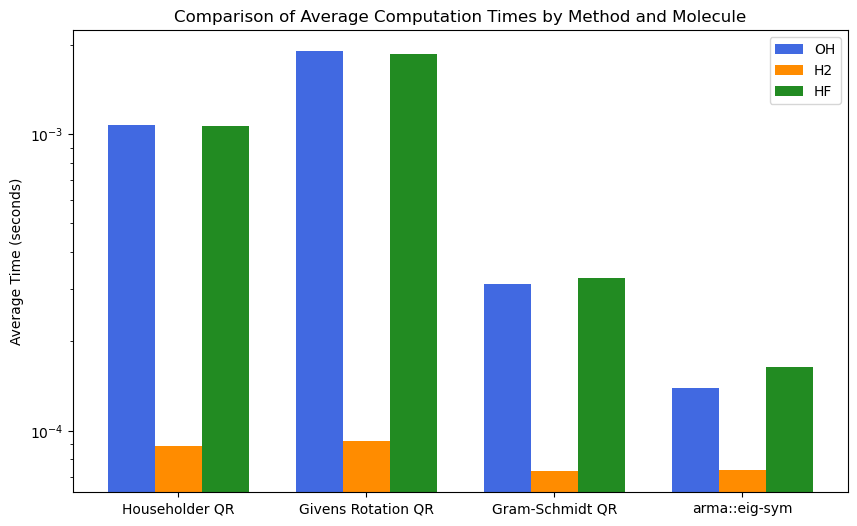

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each method and molecule
oh_times = [0.00107, 0.00190, 0.000313, 0.000139]
h2_times = [8.9e-5, 9.2e-5, 7.3e-5, 7.4e-5]
hf_times = [0.00106, 0.00186, 0.000327, 0.000164]
methods = ["Householder QR", "Givens Rotation QR", "Gram-Schmidt QR", "arma::eig-sym"]

# Setup for grouped bar chart
x = np.arange(len(methods))  # label locations
width = 0.25  # width of the bars

plt.figure(figsize=(10, 6))
# Plotting each set of bars for the different molecules
plt.bar(x - width, oh_times, width, label='OH', color='royalblue')
plt.bar(x, h2_times, width, label='H2', color='darkorange')
plt.bar(x + width, hf_times, width, label='HF', color='forestgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Computation Times by Method and Molecule')
plt.xticks(x, methods)
plt.yscale('log')
plt.legend()

plt.show()


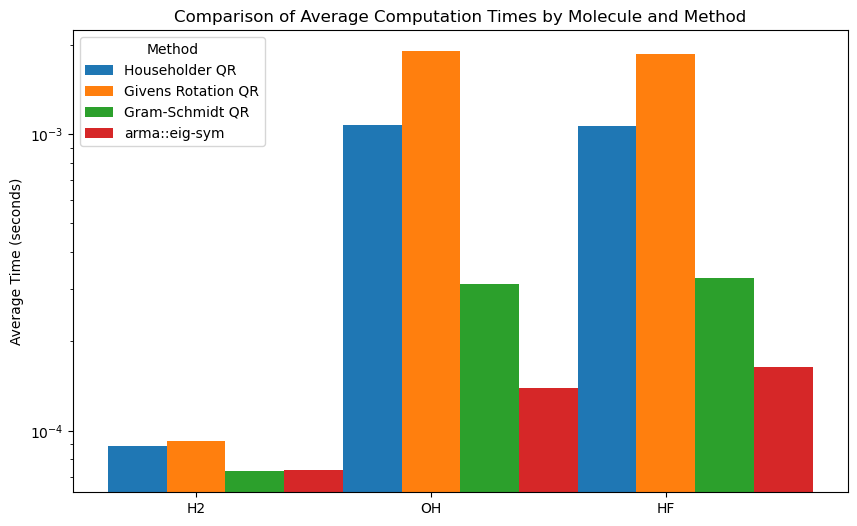

In [14]:
molecules = ['H2', 'OH', 'HF']
times = np.array([h2_times, oh_times, hf_times])

# Setup for grouped bar chart
x = np.arange(len(molecules))  # label locations
width = 0.25  # width of the bars

plt.figure(figsize=(10, 6))
# Plotting each set of bars for the different methods
for i, method in enumerate(methods):
    plt.bar(x + i*width, times[:, i], width, label=method)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Computation Times by Molecule and Method')
plt.xticks(x + width, molecules)
plt.yscale('log')
plt.legend(title="Method")

plt.show()

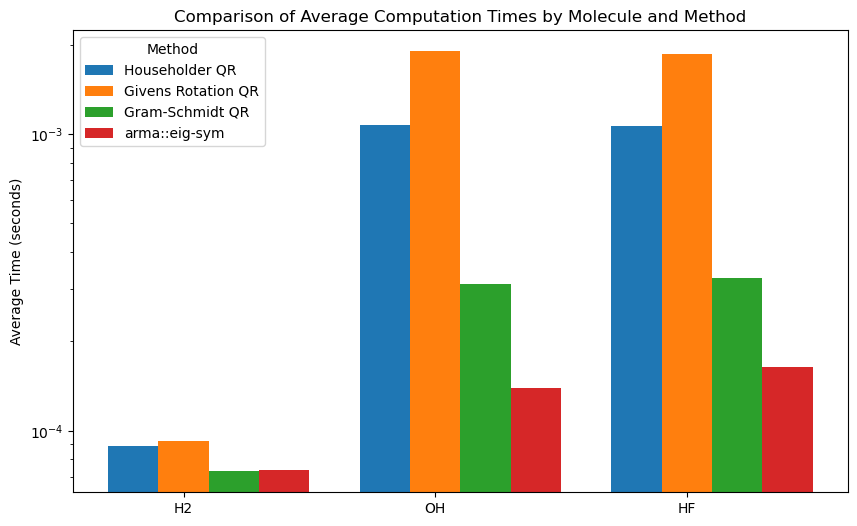

In [15]:
# Adding spacing between each group of molecule bars

# Setup for grouped bar chart with increased spacing between groups
x = np.arange(len(molecules)) * (len(methods) + 1) * width  # Adjust x locations for group spacing

plt.figure(figsize=(10, 6))
# Plotting each set of bars for the different methods with increased spacing
for i, method in enumerate(methods):
    plt.bar(x + i*width, times[:, i], width, label=method)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Computation Times by Molecule and Method')
plt.xticks(x + width, molecules)
plt.yscale('log')
plt.legend(title="Method")

plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


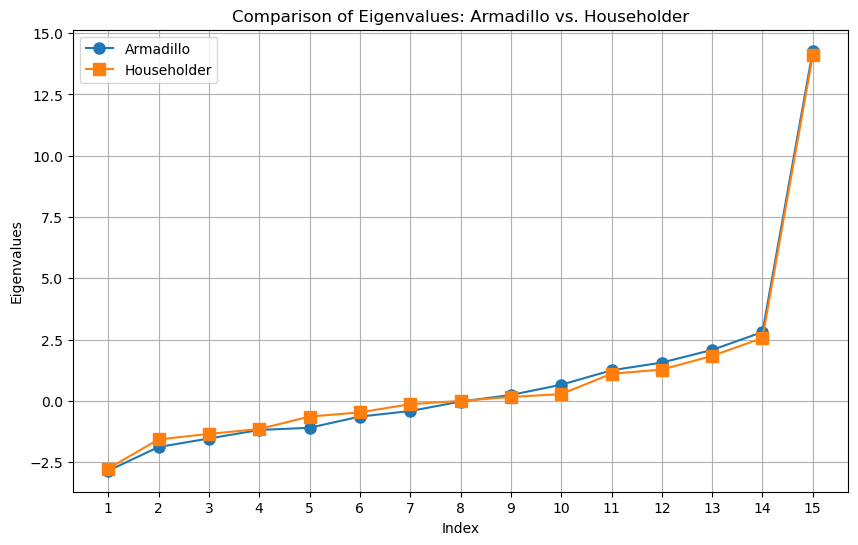

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Eigenvalues (Armadillo)
eigen_armadillo = [
   -2.8469, -1.8797, -1.5327, -1.1853, -1.0951,
   -0.6381, -0.4128, -0.0266, 0.2412, 0.6601,
    1.2480, 1.5641, 2.0808, 2.8097, 14.2834
]

# Eigenvalues (Householder)
eigen_householder = [
   -2.7584, -1.5697, -1.3450, -1.1466, -0.6382,
   -0.4679, -0.1323, -6.1244e-10, 0.1629, 0.2773,
    1.1081, 1.2781, 1.8363, 2.5654, 14.1000
]

# Create an index for the eigenvalues
index = np.arange(1, len(eigen_armadillo) + 1)

# Plotting the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(index, eigen_armadillo, 'o-', label='Armadillo', markersize=8)
plt.plot(index, eigen_householder, 's-', label='Householder', markersize=8)
plt.xlabel('Index')
plt.ylabel('Eigenvalues')
plt.title('Comparison of Eigenvalues: Armadillo vs. Householder')
plt.legend()
plt.grid(True)
plt.xticks(index)
plt.show()
